# Projet NLP : MONTMEAT Florian et KROLIKOWSKI Linda


# Exploration des données

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib style 
plt.style.use('ggplot')

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime
from string import punctuation

In [0]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (3150, 5)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [0]:
# Transform string data and remove punctuation
df['verified_reviews'] = df.verified_reviews.apply(lambda x: x.lower())
df['verified_reviews'] = df.verified_reviews.apply(lambda x: ''.join([c for c in x if c not in punctuation]))

In [0]:
df.verified_reviews.drop_duplicates().apply(len).mean()

144.5501113585746

Text(0.5, 1.0, 'Distribution de la taille des commentaires')

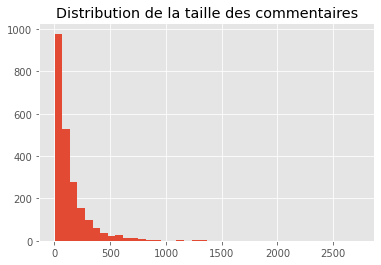

In [0]:
%matplotlib inline
# histogramme de la taille des commentaires
df.verified_reviews.drop_duplicates().apply(len).hist(bins=40)
plt.title('Distribution de la taille des commentaires')

In [0]:
df.verified_reviews.apply(len).describe()

count    3150.000000
mean      128.161587
std       177.175585
min         1.000000
25%        28.000000
50%        71.000000
75%       161.000000
max      2730.000000
Name: verified_reviews, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4aed16e48>,
      dtype=object)

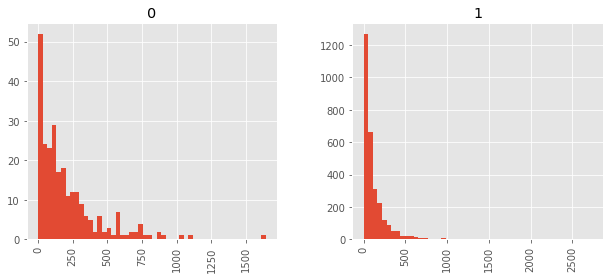

In [0]:
# longueur des commentaires en fonction de s'ils sont positifs ou négatifs
df['length'] = df['verified_reviews'].apply(len)
df.hist(column='length', by='feedback', bins=50,figsize=(10,4))

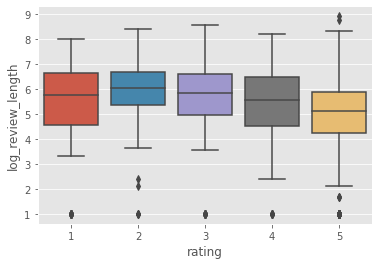

In [0]:
df['review_length'] = df.verified_reviews.apply(lambda x: len(x))
df['log_review_length'] = df.review_length.apply(lambda x: (np.log(x)+1))
sns.boxplot('rating','log_review_length',data=df)

In [0]:
#taille des échantillons de notes
df.groupby(df.rating).size()

rating
1     161
2      96
3     152
4     455
5    2286
dtype: int64

In [0]:
#taille des échantillons de satisfactions
df.groupby(df.feedback).size()

feedback
0     257
1    2893
dtype: int64

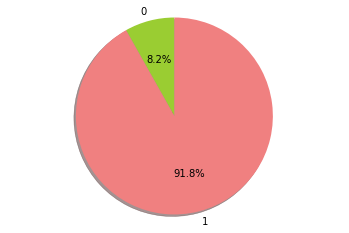

In [0]:
import matplotlib.pyplot as plt

labels = '0', '1'
sizes = df.groupby(df.feedback).size().tolist()
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [0]:
A = np.array(Image.open('amazon_PNG25.png'))

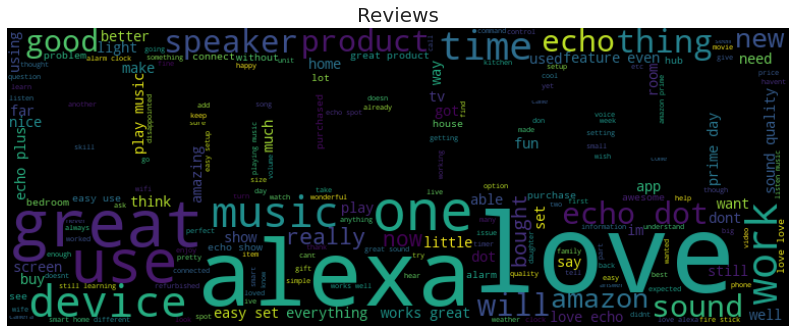

In [0]:
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(df['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews',size=20)
plt.show()

Text(0.5, 1.0, 'Counts of each variation')

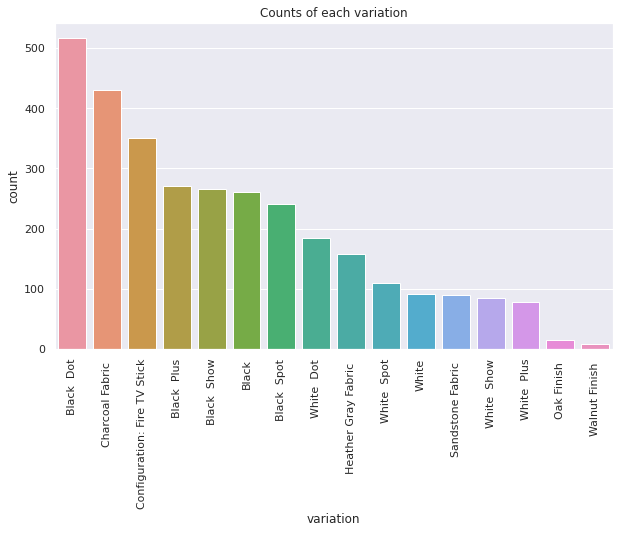

In [0]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(df.variation,
              order = df['variation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each variation')

In [0]:
df.rating.value_counts() # trop de commentaires  à 5 étoiles

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [0]:
data5 = df[df.rating == 5]
data_not_5 = df[df.rating != 5]
data1 = df[df.rating == 1]

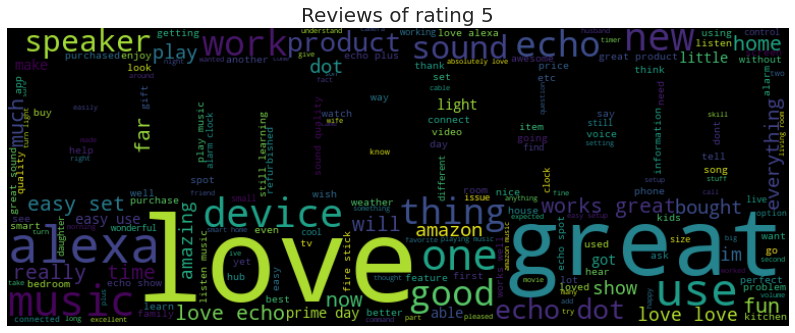

In [0]:
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data5['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of rating 5',size=20)
plt.show()

In [0]:
pd.options.display.max_colwidth = 200
# 3 premiers commentaires comprenant le mot prime
data5[data5['verified_reviews'].str.contains('prime')]['verified_reviews'][:3]

39    this is my first digital assistant so im giving this a good review speaker is really good for the cheap price on prime day fun to play with and can be used as an alarm clock thats what i was going...
89                                                                                 works great but i dont think amazon should charge another cent for unlimited music when you 1 have prime and 2 buy an echo
94    love it i was thinking about getting one and when the prime day discount was offered i could not pass it up its fun to ask alexa to play any song or group and she comes up with a playlist from ama...
Name: verified_reviews, dtype: object

Bon rapport qualité prix, acheté pendant le "prime day" (grand jour de solde chez amazon)


In [0]:
data5[data5['verified_reviews'].str.contains('time ')]['verified_reviews'][:3]

12     i purchased this for my mother who is having knee problems now to give her something to do while trying to over come not getting around so fast like she didshe enjoys all the little and big things...
94     love it i was thinking about getting one and when the prime day discount was offered i could not pass it up its fun to ask alexa to play any song or group and she comes up with a playlist from ama...
140    i have had for only a week so i am still learning all that alexa can do  it is a learning process  i love the music i can call up any time  i listen to podcasts and radio stations  i have just sta...
Name: verified_reviews, dtype: object

Utile pour la maman qui a mal au genou



In [0]:
data5[data5['verified_reviews'].str.contains('easy')]['verified_reviews'][:3]

11    i love it learning knew things with it eveyday still figuring out how everything works but so far its been easy to use and understand she does make me laugh at times
16                                                                                                        really happy with this purchase  great speaker and easy to set up
26                        i love my echo its easy to operate loads of funit is everything as advertised i use it mainly to play my favorite tunes and test alexas knowledge
Name: verified_reviews, dtype: object

Ceux qui ont mis 5 étoiles aiment écouter de la musique avec, bon prix

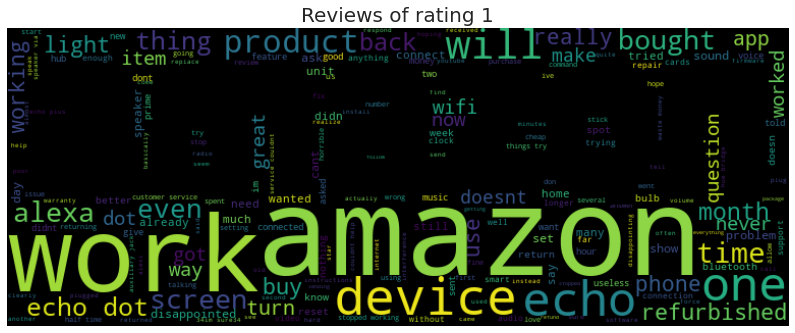

In [0]:
sns.set(rc={'figure.figsize':(14,8)})
reviews = ' '.join(data1['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of rating 1',size=20)
plt.show()

le mot work est plus important que pour les 5 étoiles tout comme echo, device
on peut voir refurbished, back 

In [0]:
data1[data1['verified_reviews'].str.contains('useless')]['verified_reviews'][:3]

531     this is the worst amazon purchase i have made i am big amazon fanlove the brandunlimited digital musicprime videoseven buy my online games music and movies through amazon this app i have tried to ...
579                                                                                               great product but useless overall too many unnecessary features unless you have a smart home you dont need it
1209    this product currently has two related software flaws that make it completely unusable1 there is a 34card34 on the homescreen called 34things to try34  its an ad for other alexa services you can t...
Name: verified_reviews, dtype: object

In [0]:
data1[data1['verified_reviews'].str.contains('sound')]['verified_reviews'][:3]

521                                                                      two weeks after setting it up it no longer works  no connection no light no sound  i guess i shouldnt have purchased a refurbished dot
576     so far not impressed at all does not save groups correctly can not understand me most of the time im not sure what the excitement is all about alexas voice sounds like its under water how am i sup...
1448    dont waste your money  i own an echo gen 1 and echo gen 2 and a dot they all do a far better job of voice recognition that the echo show  in fact it is so bad that it is virtually useless  also th...
Name: verified_reviews, dtype: object

In [0]:
data1[data1['verified_reviews'].str.contains('refurbished')]['verified_reviews'][:3]

396    i bought an echo dot that had been refurbished but its stops whatever function its performing quite often doesnt wake up every time randomly turns on but does nothing do not buy a refurbished echo...
420    item has never worked out of box it is broken spent several days trying to get it working and running same 34fixes34 from amazon the only thing accomplished is i will never order another refurbish...
424                                                                                                   great product but returning for new alexa dot  refurbished is already giving me problems with connection
Name: verified_reviews, dtype: object

Les mauvais commentaires concernent :


1.   Un mauvais service après-vente ou de livraison
2.   Inutilité du produit par rapport à d'autres





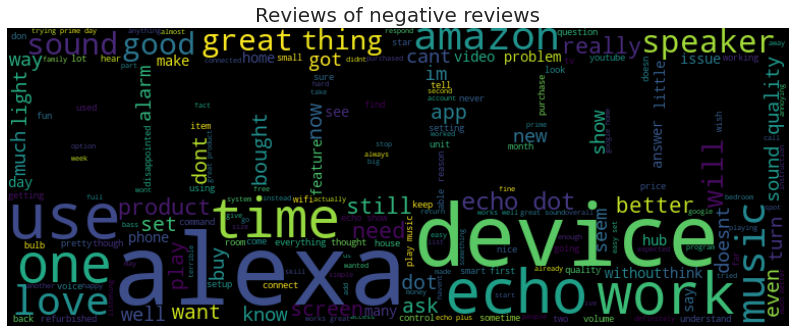

In [0]:
reviews = ' '.join(data_not_5['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A,background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews of negative reviews',size=20)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

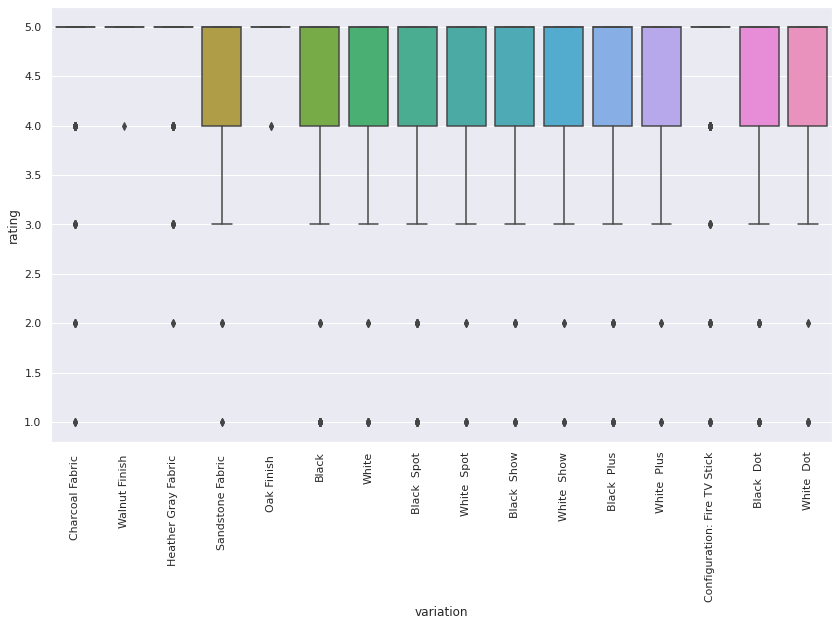

In [0]:
sns.boxplot(df.variation, df.rating)
plt.xticks(rotation = 90)
# trop de 5 étoiles!! Les commentaires à 1 ou 2 étoiles sont considérés comme outliers!!

# Etudes du corpus

In [0]:
# List of words with separator = " "
 arr = df.verified_reviews.drop_duplicates().apply(lambda x: x.split(' ')).array

from functools import reduce
from operator import add

arr = reduce(add, arr) # Concatenates all lists contained in arr
len(set(arr)) 
# the set object transforms a list to the set of unique elements in the list 

4614

In [0]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer()]

for tok in tokenizers:
  arr = df.verified_reviews.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  arr = reduce(add, arr)
  # the set object transforms a list to the set of unique elements in the list :
  print("Vocabulary size: {0} with {1} tokenizer".format(len(set(arr)), tok))  

Vocabulary size: 4545 with <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fa482061c18> tokenizer
Vocabulary size: 4569 with <nltk.tokenize.toktok.ToktokTokenizer object at 0x7fa482061ba8> tokenizer


Counter({'the': 2653, 'i': 2433, 'to': 2233, 'it': 2057, 'and': 1803, 'a': 1214, 'my': 1112, 'is': 995, 'for': 849, 'this': 687, 'love': 677, 'echo': 650, 'with': 632, 'of': 622, 'have': 608, 'that': 544, 'in': 542, 'great': 518, 'but': 509, 'on': 493, 'alexa': 457, 'so': 446, 'not': 443, 'you': 433, 'as': 414, 'can': 406, '’': 403, 'like': 376, 'use': 364, 'was': 359, 'music': 355, 'up': 353, 'we': 339, 'works': 288, 'one': 282, 'all': 280, 'very': 274, 'be': 267, 'just': 262, 'easy': 258, 'more': 249, 'its': 243, 'sound': 235, 'when': 235, 'me': 222, 'do': 218, 'set': 218, 'amazon': 217, 'are': 213, 'an': 211, 'dot': 210, 'or': 208, 'good': 207, 'has': 197, 'get': 196, 'if': 185, 'would': 185, 'product': 184, 'device': 183, 'had': 175, 't': 175, 'from': 169, 'what': 167, 'home': 165, 'bought': 164, 'will': 158, 'no': 157, 'she': 156, 'at': 156, 'am': 154, 'time': 153, 'other': 153, 'speaker': 151, 'than': 150, 'our': 149, 'still': 148, 'new': 148, 'really': 145, 'show': 145, 'much': 

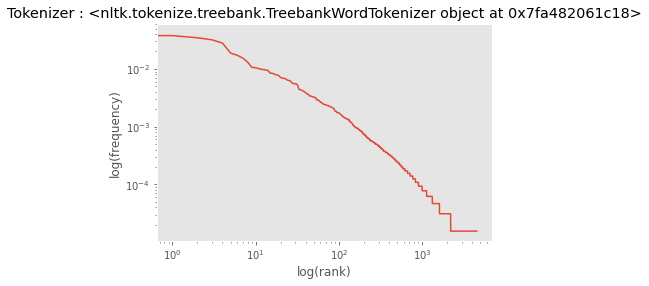

Counter({'the': 2653, 'i': 2433, 'to': 2233, 'it': 2057, 'and': 1803, 'a': 1214, 'my': 1112, 'is': 995, 'for': 849, 'this': 687, 'love': 677, 'echo': 649, 'with': 632, 'of': 622, 'have': 608, 'that': 544, 'in': 542, 'great': 518, 'but': 509, 'on': 493, 'alexa': 450, 'so': 446, 'you': 433, 'not': 424, 'as': 414, '’': 403, 'can': 387, 'like': 376, 'use': 364, 'was': 359, 'music': 355, 'up': 353, 'we': 339, 'works': 288, 'one': 282, 'all': 280, 'very': 274, 'be': 267, 'just': 262, 'easy': 259, 'more': 249, 'its': 243, 'sound': 235, 'when': 235, 'me': 222, 'do': 218, 'set': 218, 'amazon': 217, 'are': 213, 'an': 211, 'dot': 209, 'or': 208, 'good': 207, 'has': 197, 'get': 196, 'if': 185, 'would': 185, 'product': 184, 'device': 183, 'had': 175, 't': 175, 'from': 169, 'what': 167, 'home': 165, 'bought': 164, 'will': 158, 'she': 156, 'at': 156, 'no': 156, 'am': 154, 'time': 153, 'other': 153, 'speaker': 151, 'than': 150, 'our': 149, 'still': 148, 'new': 148, 'really': 145, 'show': 145, 'much': 

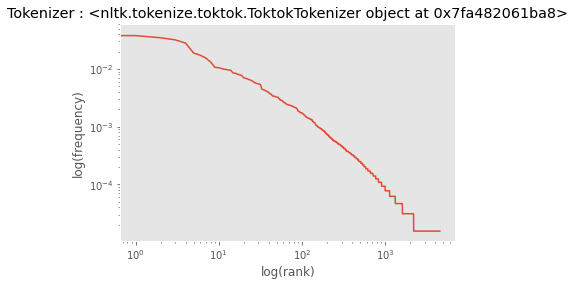

In [0]:
from collections import Counter
import matplotlib.pyplot as plt

for tok in tokenizers:
  arr = df.verified_reviews.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  arr = reduce(add, arr)
  # We use reduce to concatenate all the lists in arr, but we don't use "set" 
  # so that we can count occurencies with a Counter object 
  c = Counter(arr)
  print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# on enlève les stopwords (such as “the”, “a”, “an”, “in”)
word_tokenize(df.verified_reviews[0])

stop_words = set(stopwords.words('english')) 

df['cleaned_reviews'] = df.verified_reviews.apply(lambda x: word_tokenize(x))

df['cleaned_reviews'] = df.cleaned_reviews.apply(lambda x: [w for w in x if w not in stop_words])

df['cleaned_reviews'] = df.cleaned_reviews.apply(lambda x: ' '.join(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Nettoyage du corpus

In [0]:
# Usage of Phrases and Phraser from gensim
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

def remove_hashtags(tokens):
  tokens = map(lambda x: x.replace('#', ''), tokens)
  return list(tokens)

def remove_url(tokens):
  tokens = filter(lambda x: "http" not in x, tokens)
  return list(tokens)

def remove_html(tokens):
  tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
  return list(tokens)

from tqdm import tqdm
def tokenize_url_hashtags(corpus):
  tokenizer = TreebankWordTokenizer() 
  tokenized_sentences = []
  for sample in tqdm(corpus):
    tokens = tokenizer.tokenize(sample)
    tokens = remove_url(tokens)
    tokens = remove_html(tokens)
    tokens = remove_hashtags(tokens)
    tokens = list(map(lambda x: x.lower(), tokens))
    tokenized_sentences.append(tokens)
  return tokenized_sentences

cleaned = tokenize_url_hashtags(df.verified_reviews.array)

 23%|██▎       | 733/3150 [00:00<00:00, 7327.37it/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100%|██████████| 3150/3150 [00:00<00:00, 6679.01it/s]


### Analyse de MultiWord

In [0]:
from gensim.models.phrases import Phrases, Phraser

def clean_corpus(corpus, threshold=100):
  tokenized_sentences = tokenize_url_hashtags(corpus)
  phrases = Phrases(tokenized_sentences, threshold=threshold)
  phraser = Phraser(phrases)
  # Merging multi-word expressions in the tokenization
  clean_corpus = []
  for sentence in tokenized_sentences:
    clean_corpus.append(phraser[sentence])  
  return clean_corpus

In [0]:
X = clean_corpus(df.verified_reviews.array, 100)

100%|██████████| 3150/3150 [00:00<00:00, 6690.97it/s]


In [0]:
from gensim.models.phrases import Phrases, Phraser

def show_phrases(tokenized_sentences, threshold=10, shown=15):
  # Training the multi-word expression detector
  phrases = Phrases(tokenized_sentences, threshold=threshold)
  i = 0
  # fréquence du couple (cb de fois new et york sont assemblés) pénalisée par la fréquence de chacun des mots (en divisant.). Je suis est très commun mais suis et je aussi
  for phrase, score in phrases.export_phrases(tokenized_sentences):
    if i>shown:
      break
    else:
      print("Expression : {0}, score = {1}".format(phrase, score))
    i=i+1

In [0]:
show_phrases(X, threshold=100)

Expression : b'2nd gen', score = 130.21031746031744
Expression : b'shopping lists', score = 142.66521739130434
Expression : b'2nd gen', score = 130.21031746031744
Expression : b'fire tv', score = 158.30833333333334
Expression : b'worth every_penny', score = 240.3882783882784
Expression : b'4 stars', score = 121.52962962962964
Expression : b'shopping lists', score = 142.66521739130434
Expression : b'5 star', score = 126.20384615384616
Expression : b'fire tv', score = 158.30833333333334
Expression : b'2nd gen', score = 130.21031746031744
Expression : b'fire tv', score = 158.30833333333334
Expression : b'worth every_penny', score = 240.3882783882784
Expression : b'2nd gen', score = 130.21031746031744
Expression : b'shopping lists', score = 142.66521739130434
Expression : b'2nd gen', score = 130.21031746031744
Expression : b'fire tv', score = 158.30833333333334


# Sentiment Classification Test

### Division train-dev


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
y = df.feedback
print(y.shape)

(3150,)


In [0]:
from collections import Counter
# nombre de feedback négatif et positif
Counter(y)

Counter({0: 257, 1: 2893})

In [0]:
X = clean_corpus(df.verified_reviews.array, 100) #affecte à X les avis nettoyés
X = [' '.join(x) for x in X]
print(len(X), X[0])
print(len(df.verified_reviews.array), df.verified_reviews.array[0])

100%|██████████| 3150/3150 [00:00<00:00, 6957.31it/s]


3150 love my echo
3150 love my echo


In [0]:
# create train 66% 
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train)
print(y_train)

['love these guys they work so great', 'i set her up to play through our home theater system so fat we are just using her for weather forecasts cooking timers and we really enjoy the music', 'i basically use it to play music and tell me the newsits sometimes hard to communicate with it if i dont say the command correctly but i realize its learning my style of speaking and will do some commands even though i dont say them exactly as i should', 'love it but having a hard time setting up all the apps', 'its not as good as siri but it still has some positives its great at playing music and setting alarms i personally felt that i paid too much for this product as it was nearly half off on prime_day literally the day after i purchased it so im pretty disappointed i might still return it and get my money back', 'great sound and easy to set up purchased the echo plus because it had a built in hub and would make it easier to connect to devices i am hooked on alexa', 'like having the music where

In [0]:
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape

(2110, 3893)

In [0]:
# for dev set
X_dev_cv = cv.transform(X_dev)
X_dev_cv.shape

(1040, 3893)

In [0]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb_trained = lb.fit(y_train)
y_train_lb = lb_trained.transform(y_train)
y_dev_lb = lb_trained.transform(y_dev)
print(y_train_lb.shape, y_dev_lb.shape)

(2110,) (1040,)


## SVM (meilleur prédicteur)

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

svm = LinearSVC(verbose=1, random_state=42)
clf_svm = OneVsRestClassifier(svm, n_jobs=1 ).fit(X_train_cv, y_train_lb)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
y_pred_svm = clf_svm.predict(X_dev_cv)
print(y_pred_svm.shape)

(1040,)


In [0]:
# comparaison rapide test et prédiction
print(y_pred_svm[:40])
print(y_dev_lb[:40])

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
[1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [0]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sn

def show_eval(y_true, y_pred, lb_trained, clf):
  ''' 
  Show eval metrics.  Takes binarized y true and pred along with trained binarizer for label names
  '''
  y_true_names = lb_trained.inverse_transform(y_true)
  y_pred_names = lb_trained.inverse_transform(y_pred)
  print( classification_report(y_true_names, y_pred_names) )
  cm = confusion_matrix(y_true_names, y_pred_names) 
  labels = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

  fpr, tpr, _ = roc_curve(y_true, y_pred)
  roc_auc = auc(fpr, tpr)
  print(roc_auc)

  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()


              precision    recall  f1-score   support

           0       0.78      0.53      0.63        99
           1       0.95      0.98      0.97       941

    accuracy                           0.94      1040
   macro avg       0.86      0.75      0.80      1040
weighted avg       0.93      0.94      0.94      1040



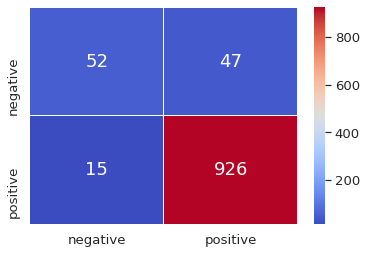

0.7546560182054338


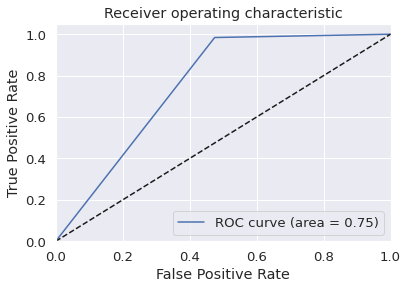

In [0]:
show_eval(y_dev_lb, y_pred_svm, lb_trained, clf_svm)

## Approche TF-IDF

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

#y_train = np.asarray(y_train.values) # convertit en array

ch2 = SelectKBest(chi2, k = 300)

X_new = ch2.fit_transform(count_train, y_train)

In [0]:
# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_dev)

X_dev_new = ch2.transform(X=count_test)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
# Le TF-IDF (de l'anglais term frequency-inverse document frequency) est une méthode 
# de pondération souvent utilisée en recherche d'information et en particulier dans la fouille de textes. 
#Cette mesure statistique permet d'évaluer l'importance d'un terme contenu dans un document, relativement à une collection ou un corpus. 
# Le poids augmente proportionnellement au nombre d'occurrences du mot dans le document. 
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_dev)

In [0]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

   072318  10  100  1000  100x  ...  zero  zigbee  zonkedout  zwave  zzzzzzz
0       0   0    0     0     0  ...     0       0          0      0        0
1       0   0    0     0     0  ...     0       0          0      0        0
2       0   0    0     0     0  ...     0       0          0      0        0
3       0   0    0     0     0  ...     0       0          0      0        0
4       0   0    0     0     0  ...     0       0          0      0        0

[5 rows x 3641 columns]
   072318   10  100  1000  100x  ...  zero  zigbee  zonkedout  zwave  zzzzzzz
0     0.0  0.0  0.0   0.0   0.0  ...   0.0     0.0        0.0    0.0      0.0
1     0.0  0.0  0.0   0.0   0.0  ...   0.0     0.0        0.0    0.0      0.0
2     0.0  0.0  0.0   0.0   0.0  ...   0.0     0.0        0.0    0.0      0.0
3     0.0  0.0  0.0   0.0   0.0  ...   0.0     0.0        0.0    0.0      0.0
4     0.0  0.0  0.0   0.0   0.0  ...   0.0     0.0        0.0    0.0      0.0

[5 rows x 3641 columns]
set()
False


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
def TextPreprocessing(train,train_y,test):
    
    CountVectorizer(stop_words="english")
    count = count_vectorizer.fit_transform(train)
    count_test = count_vectorizer.transform(X_dev)
    
    tfidf_vectorizer = TfidfTransformer()
    tfidf = tfidf_vectorizer.fit_transform(count)
    tfidf_test = tfidf_vectorizer.transform(count_test)
    
    ch2 = SelectKBest(chi2, k = 300)
    
    train_new = ch2.fit_transform(tfidf, y_train)
    test_new = ch2.transform(tfidf_test)
    
    return train_new, test_new

In [0]:
train, test = TextPreprocessing(X_train,y_train,X_dev)

### SVM

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
svm = LinearSVC(verbose=1, random_state=42)
clf_svm_tfidf = OneVsRestClassifier(svm, n_jobs=1 ).fit(train, y_train)

[LibLinear]

In [0]:
y_pred_svm_tfidf = clf_svm_tfidf.predict(test)
print(y_pred_svm_tfidf.shape)

(1040,)


              precision    recall  f1-score   support

           0       0.88      0.23      0.37        99
           1       0.93      1.00      0.96       941

    accuracy                           0.92      1040
   macro avg       0.90      0.61      0.66      1040
weighted avg       0.92      0.92      0.90      1040



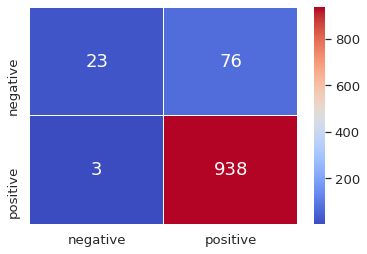

0.6145675672774504


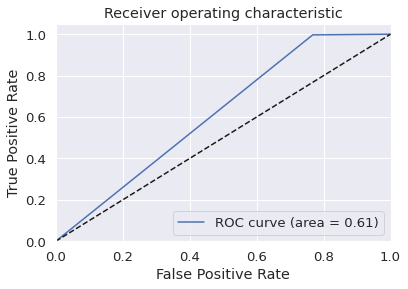

In [0]:
show_eval(y_dev, y_pred_svm_tfidf, lb_trained, clf_svm_tfidf)

### Random Forest 

In [0]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
clf = RandomForestClassifier(random_state=51)
# Fit the classifier to the training data
clf.fit(train, y_train)

# Create the predicted tags: pred
pred = clf.predict(test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_dev, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_dev, pred)
print('F score is:',f1)

Accuracy is: 0.9326923076923077
F score is: 0.9639917695473251


In [0]:
clf = RandomForestClassifier(random_state=51)
# Fit the classifier to the training data
clf.fit(X_new, y_train)

# Create the predicted tags: pred
pred = clf.predict(X_dev_new)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_dev, pred)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_dev, pred)
print('F score is:',f1)

Accuracy is: 0.9173076923076923
F score is: 0.9559426229508197


              precision    recall  f1-score   support

           0       0.72      0.21      0.33        99
           1       0.92      0.99      0.96       941

    accuracy                           0.92      1040
   macro avg       0.82      0.60      0.64      1040
weighted avg       0.90      0.92      0.90      1040



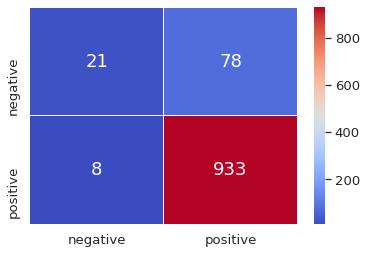

0.601809809036164


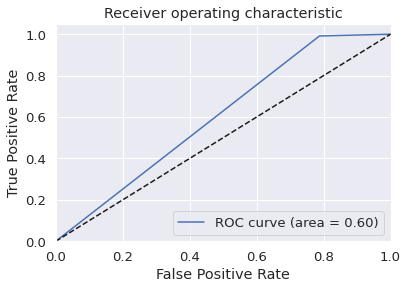

In [0]:
show_eval(y_dev, pred, lb_trained, clf)

RF avec Tfidf

In [0]:
clf_rfidf_RF = RandomForestClassifier(random_state=51)
# Fit the classifier to the training data
clf_rfidf_RF.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred_rfidf_RF = clf_rfidf_RF.predict(tfidf_test) # met un poids aux mots selon leur importance

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_dev, pred_rfidf_RF)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_dev, pred_rfidf_RF)
print('F score is:',f1)

Accuracy is: 0.9288461538461539
F score is: 0.9621676891615543


              precision    recall  f1-score   support

           0       1.00      0.25      0.40        99
           1       0.93      1.00      0.96       941

    accuracy                           0.93      1040
   macro avg       0.96      0.63      0.68      1040
weighted avg       0.93      0.93      0.91      1040



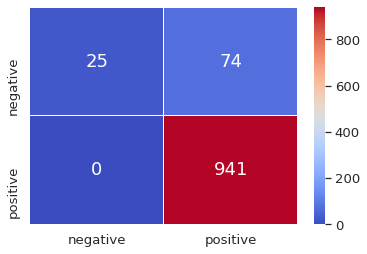

0.6262626262626263


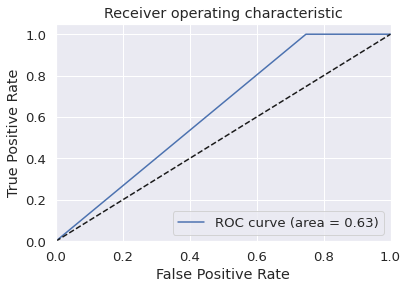

In [0]:
show_eval(y_dev, pred_rfidf_RF, lb_trained, clf_rfidf_RF)

### Tuning avec RF

In [0]:
from sklearn.model_selection import GridSearchCV

clf_tuning = RandomForestClassifier()

scorer = metrics.make_scorer(metrics.fbeta_score, beta=0.5)

parameters = {'n_estimators': [150, 180, 250], 'max_features': [120,150], 'max_depth': [120,135,150],
              'min_samples_split':[3,5],'min_samples_leaf':[1,3,5]}

grid_obj = GridSearchCV(clf_tuning, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_new, y_train)


# Get the estimator
best_clf_RF = grid_fit.best_estimator_

best_predictions_RF = best_clf_RF.predict(X_dev_new)

score = metrics.accuracy_score(y_dev, best_predictions_RF)
print('Accuracy is:',score)
f1 = metrics.f1_score(y_dev, best_predictions_RF)
print('F score is:',f1)


Accuracy is: 0.9192307692307692
F score is: 0.9567010309278351


In [0]:
best_clf_RF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features=150,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.68      0.28      0.40        99
           1       0.93      0.99      0.96       941

    accuracy                           0.92      1040
   macro avg       0.81      0.63      0.68      1040
weighted avg       0.91      0.92      0.90      1040



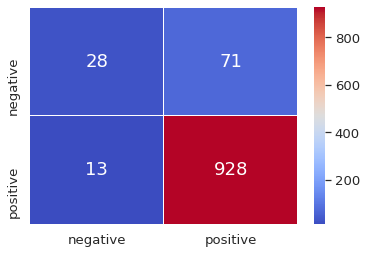

0.6345065962494231


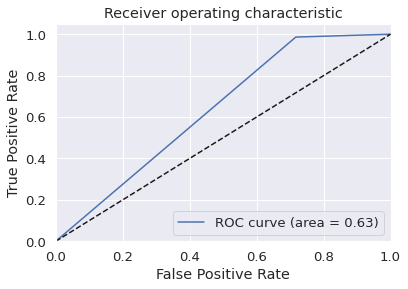

In [0]:
show_eval(y_dev, best_predictions_RF, lb_trained, best_clf_RF)

## Avec modèle Word2Vec

### Entrainement d'un modèle Word2Vec

In [0]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-03-21 15:55:49--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.104.157
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.104.157|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
from gensim import models
w = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
model = w.wv

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


### Prédiction grâce au modèle Word2Vec

In [0]:
def tokens2vectors(tokenCorpus):
  ''' transforms our X into a list of list of vec (2D array) '''
  new_sample = list()
  for sample in tokenCorpus:
    tweetVecs = list()
    for token in sample.split(' '):
      try: tweetVecs.append(model.get_vector(token)  )
      except: tweetVecs.append( np.zeros(300) ) 
    new_sample.append(np.mean(tweetVecs, axis=0))
  return np.array(new_sample)


X_train_vec = tokens2vectors(X_train)
print(X_train_vec.shape, X_train_cv.shape)
X_dev_vec = tokens2vectors(X_dev)

(2110, 300) (2110, 3893)


In [0]:
X_train_vec[0], len(X_train_vec[0])

(array([ 1.82931088e-02,  4.60030697e-02,  5.83757693e-03,  1.66922435e-01,
        -1.22419083e-02, -2.31584813e-02,  5.64313605e-02, -8.32519531e-02,
        -1.66451596e-02,  1.04561940e-01,  5.92476968e-03, -1.05678014e-01,
        -3.61066535e-02, -4.30733822e-02, -1.95975170e-01,  6.52029887e-02,
         9.57728773e-02,  1.66660860e-01, -1.21024000e-02, -2.55257748e-02,
        -3.93963531e-02,  5.21414634e-03,  9.98360738e-02, -4.74155955e-02,
         1.17327012e-01,  2.15018131e-02, -4.28118035e-02, -3.56445312e-02,
        -1.66102815e-02, -1.28662109e-01, -6.23430535e-02,  8.75244141e-02,
         8.79778191e-02,  2.89655421e-02,  1.01257324e-01,  1.42517090e-02,
         7.63113871e-02, -2.90440153e-02,  5.46373650e-02,  1.43641874e-01,
         2.00055808e-01, -4.36139777e-02,  1.44496366e-01, -3.51736881e-02,
        -4.38232422e-02, -2.53644679e-02,  7.95200933e-03, -3.43762822e-02,
        -3.45284608e-03,  8.99832603e-03,  2.60881688e-02,  1.13490514e-01,
        -7.8

#### SVM avec Word2Vec


In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
svm = LinearSVC(verbose=1, random_state=42)
clf_svm_wv = OneVsRestClassifier(svm, n_jobs=1).fit(X_train_vec, y_train_lb)
y_pred_svm_wv = clf_svm_wv.predict(X_dev_vec)
print(y_pred_svm.shape)

[LibLinear](1040,)


              precision    recall  f1-score   support

           0       0.76      0.19      0.31        99
           1       0.92      0.99      0.96       941

    accuracy                           0.92      1040
   macro avg       0.84      0.59      0.63      1040
weighted avg       0.91      0.92      0.89      1040



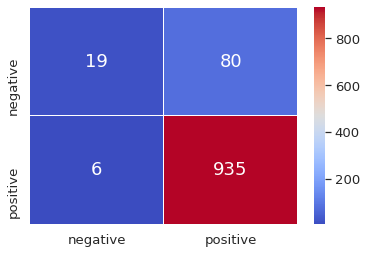

0.5927714981912644


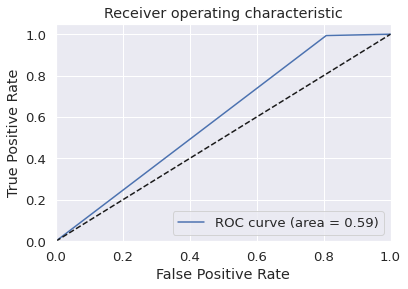

In [0]:
show_eval(y_dev_lb, y_pred_svm_wv, lb_trained, svm )

#### Random Forest avec Word2Vec

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1, verbose=1)
rfc.fit(X_train_vec, y_train_lb)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       1.00      0.21      0.35        99
           1       0.92      1.00      0.96       941

    accuracy                           0.93      1040
   macro avg       0.96      0.61      0.66      1040
weighted avg       0.93      0.93      0.90      1040



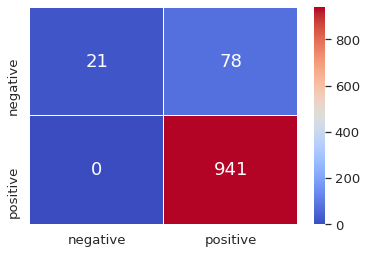

0.6060606060606061


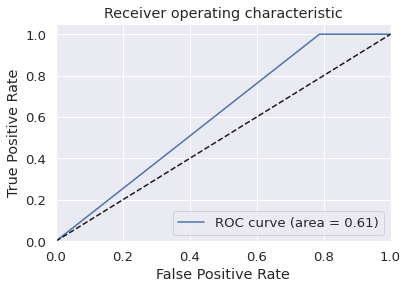

In [0]:
y_pred_rfc = rfc.predict(X_dev_vec)
show_eval(y_dev_lb, y_pred_rfc, lb_trained, rfc )

#### RF Word2Vec avec selection des meilleurs paramètres

In [0]:
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

rfc_wv = RandomForestClassifier()

scorer = metrics.make_scorer(metrics.fbeta_score, beta=0.5)

parameters = {'n_estimators': [10, 30, 100], 'max_features': [120,150], 'max_depth': [120,135,150]}

grid_obj_rf_wv = GridSearchCV(rfc_wv, parameters, scoring=scorer)

In [0]:
grid_fit_rf_wv = grid_obj_rf_wv.fit(X_train_vec, y_train_lb)

# Get the estimator
best_rf_wv = grid_fit_rf_wv.best_estimator_

best_predictions = best_rf_wv.predict(X_dev_vec)

              precision    recall  f1-score   support

           0       0.89      0.32      0.47        99
           1       0.93      1.00      0.96       941

    accuracy                           0.93      1040
   macro avg       0.91      0.66      0.72      1040
weighted avg       0.93      0.93      0.92      1040



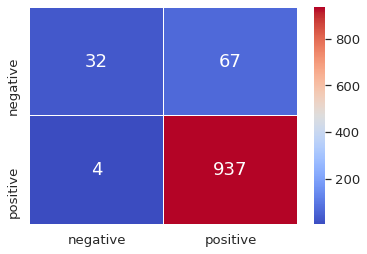

0.6594907631039406


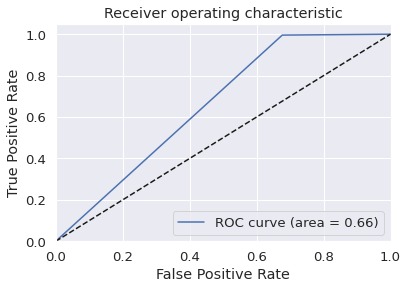

In [0]:
show_eval(y_dev_lb, best_predictions, lb_trained, best_rf_wv)

# Test avec réechantillonage

In [0]:
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
sm = SMOTE(sampling_strategy = 0.6, random_state=42, k_neighbors=5)
XTrainSM, yTrainSM = sm.fit_resample(X_train_cv, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
Counter(yTrainSM)

Counter({0: 1171, 1: 1952})

In [0]:
lb_sm = preprocessing.LabelEncoder()
lb_sm_trained = lb_sm.fit(yTrainSM)
y_train_sm_lb = lb_sm_trained.transform(yTrainSM)
y_dev_sm_lb = lb_sm_trained.transform(y_dev)
print(y_train_sm_lb.shape, y_dev_sm_lb.shape)

(3123,) (1040,)


## SVM avec réechantillonage

In [0]:
svm_sm = LinearSVC(verbose=1, random_state=42)
clf_svm_sm = OneVsRestClassifier(svm_sm, n_jobs=1).fit(XTrainSM, y_train_sm_lb)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
y_pred_svm_sm = clf_svm_sm.predict(X_dev_cv)
print(y_pred_svm_sm.shape)

(1040,)


In [0]:
print(y_pred_svm_sm[:40])
print(y_dev_lb[:40])

[1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1]
[1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


              precision    recall  f1-score   support

           0       0.47      0.71      0.57        99
           1       0.97      0.92      0.94       941

    accuracy                           0.90      1040
   macro avg       0.72      0.81      0.75      1040
weighted avg       0.92      0.90      0.91      1040



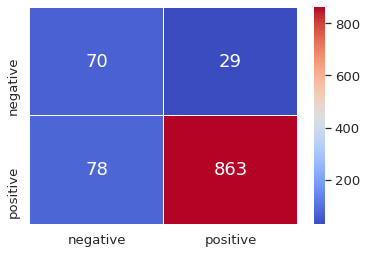

0.8120900825470432


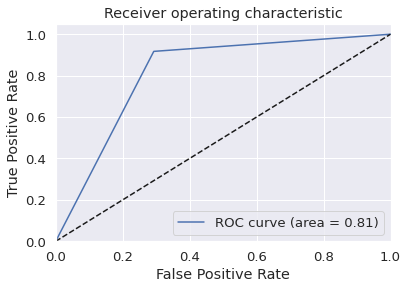

In [0]:
show_eval(y_dev_lb, y_pred_svm_sm, lb_sm_trained, clf_svm_sm)

## Random Forest avec réechantillonage

In [0]:
rf_sm = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42, n_jobs=-1, verbose=1)
rf_sm.fit(XTrainSM, y_train_sm_lb)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.45      0.43      0.44        99
           1       0.94      0.94      0.94       941

    accuracy                           0.90      1040
   macro avg       0.69      0.69      0.69      1040
weighted avg       0.89      0.90      0.89      1040



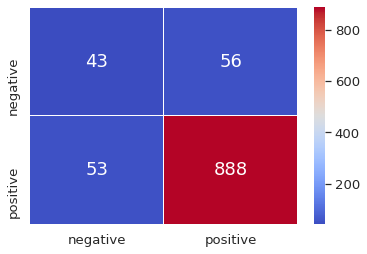

0.6890101868847884


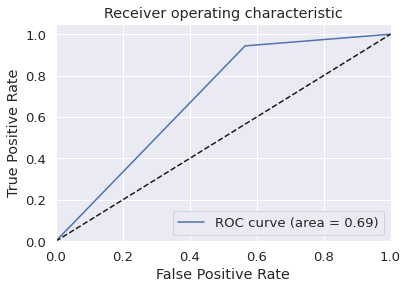

In [0]:
y_pred_rf_sm = rf_sm.predict(X_dev_cv)
show_eval(y_dev_lb, y_pred_rf_sm, lb_sm_trained, rf_sm )

In [0]:
rf_sm_best = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)

scorer = metrics.make_scorer(metrics.fbeta_score, beta=0.5)

parameters = {'n_estimators': [10, 30, 100], 'max_features': [120,150], 'max_depth': [120,135,150]}

grid_obj_rf_sm = GridSearchCV(rf_sm_best, parameters, scoring=scorer)

In [0]:
grid_fit_rf_sm = grid_obj_rf_sm.fit(XTrainSM, y_train_sm_lb)


# Get the estimator
best_rf_sm = grid_fit_rf_sm.best_estimator_

best_predictions_sm = best_rf_sm.predict(X_dev_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 o

              precision    recall  f1-score   support

           0       0.44      0.51      0.47        99
           1       0.95      0.93      0.94       941

    accuracy                           0.89      1040
   macro avg       0.69      0.72      0.70      1040
weighted avg       0.90      0.89      0.89      1040



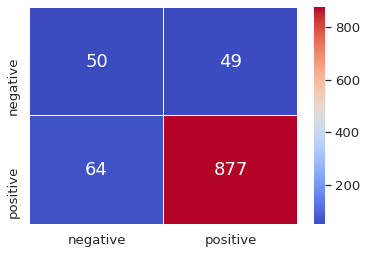

0.7185188763297158


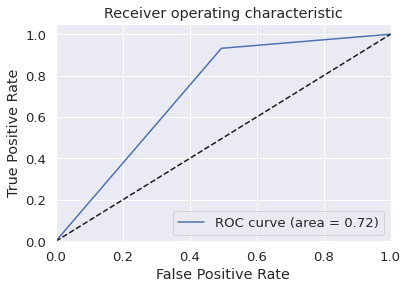

In [0]:
show_eval(y_dev_lb, best_predictions_sm, lb_sm_trained, best_rf_sm)

# Comparaison de 3 approches

In [0]:
pmodel1 = clf_svm.predict_proba(X_dev_cv)[:, 1]
pmodel2 = best_rf_wv.predict_proba(X_dev_vec)[:, 1]
pmodel3 = clf_svm_sm.predict_proba(X_dev_cv)[:, 1]


In [0]:
final = pd.DataFrame(X_dev)
final["SVM"] = pmodel1
final["RF + W2V + Tun"] = pmodel2
final["SVM + Smote"] = pmodel3
final["label"] = list(y_dev)
final.head(20)

,0,SVM,RF + W2V + Tun,SVM + Smote,label
0,love it we are still learning the capabilities...,0.982476,1.000000,0.999994,1
1,very easy setup,0.954294,1.000000,0.932086,1
2,,0.914972,0.787458,0.240585,1
3,i purchased this on prime_day mostly as a pres...,0.783155,1.000000,0.976484,1
4,fun and information no dislikes so far like th...,0.959148,1.000000,0.992183,1
5,i am very pleased with the fire_stick,0.969079,1.000000,0.964166,1
6,love these great in the bathroom to listen to ...,0.991913,1.000000,0.999994,1
7,speakers are not as loud as google home,0.855251,0.700000,0.364099,1
8,echo dot and related devices are the best thin...,0.949481,0.900000,0.953537,1
9,easy to use great for recipes listen to music ...,0.987829,1.000000,1.000000,1


In [0]:
erreurs = final[final["label"] == 0].sort_values("SVM")
erreurs.head()

,0,SVM,RF + W2V + Tun,SVM + Smote,label
444,all is fine with the spot exact for one massiv...,0.011740,0.8,3.560920e-03,0
845,i would not recommend this to anyone it wont l...,0.041582,0.5,2.201412e-01,0
767,waste of money over the echo generation 2 you ...,0.042454,0.8,1.945449e-07,0
76,great product except there is no possible way ...,0.089195,0.7,7.124919e-02,0
858,i own 3 of these amazon is ignoring its custom...,0.111348,0.8,6.245141e-06,0


In [0]:
erreurs = final[final["label"] == 0].sort_values("RF + W2V + Tun")
erreurs.head()

,0,SVM,RF + W2V + Tun,SVM + Smote,label
432,alexa hardly came on,0.554157,0.0,0.240510,0
58,used twice not working,0.485308,0.0,0.219813,0
774,not connected to my phone playlist,0.485281,0.1,0.182436,0
230,cheap and cheap sound,0.485263,0.1,0.240543,0
41,the product sounded the same as the emoji spea...,0.485333,0.2,0.240506,0


In [0]:
erreurs = final[final["label"] == 0].sort_values("SVM + Smote")
erreurs.head()

,0,SVM,RF + W2V + Tun,SVM + Smote,label
767,waste of money over the echo generation 2 you ...,0.042454,0.8,1.945449e-07,0
858,i own 3 of these amazon is ignoring its custom...,0.111348,0.8,6.245141e-06,0
444,all is fine with the spot exact for one massiv...,0.011740,0.8,3.560920e-03,0
158,very bad this device i don ’ t know if it ’ s ...,0.619808,0.4,3.978888e-03,0
743,i only purchase the echo plus because it has a...,0.329643,0.9,1.188432e-02,0


Analyse d'erreurs sur les mauvaises prédictions d'avis négatifs

In [0]:
final["diff12"] = final["SVM"] - final["RF + W2V + Tun"]
erreurs = final[final["label"] == 0].sort_values("diff12")
erreurs.head(10)

,0,SVM,RF + W2V + Tun,SVM + Smote,label,diff12
444,all is fine with the spot exact for one massiv...,0.011740,0.8,3.560920e-03,0,-0.788260
767,waste of money over the echo generation 2 you ...,0.042454,0.8,1.945449e-07,0,-0.757546
858,i own 3 of these amazon is ignoring its custom...,0.111348,0.8,6.245141e-06,0,-0.688652
1018,the firestick we were sent doesn ’ t work at a...,0.158655,0.8,9.999998e-01,0,-0.641345
76,great product except there is no possible way ...,0.089195,0.7,7.124919e-02,0,-0.610805
743,i only purchase the echo plus because it has a...,0.329643,0.9,1.188432e-02,0,-0.570357
930,garbageeven trying to watch amazon prime video...,0.500000,1.0,9.856318e-01,0,-0.500000
661,the echo works fine but then you get indundate...,0.408139,0.9,1.690608e-02,0,-0.491861
835,it worked for a month or so then it stopped iv...,0.125167,0.6,4.786415e-02,0,-0.474833
783,i dont like how i can not load my hulu account...,0.435906,0.9,8.597651e-01,0,-0.464094


In [0]:
erreurs.tail(10)


,0,SVM,RF + W2V + Tun,SVM + Smote,label,diff12
237,fairly useless,0.897241,0.473611,0.287862,0,0.423630
381,it still doesn ’ t work i bet if i call and le...,0.926056,0.500000,0.750676,0,0.426056
58,used twice not working,0.485308,0.000000,0.219813,0,0.485308
584,get rid of the 34thongs to try34 screen numb nuts,0.892206,0.400000,0.058157,0,0.492206
853,disconnects often,0.904030,0.400000,0.220351,0,0.504030
732,meh,0.912864,0.400000,0.232594,0,0.512864
432,alexa hardly came on,0.554157,0.000000,0.240510,0,0.554157
355,sad joke worthless,0.914972,0.300000,0.240585,0,0.614972
964,sad joke worthless,0.914972,0.300000,0.240585,0,0.614972
913,it don ’ t show nothing,0.831356,0.200000,0.091240,0,0.631356


In [0]:
final["diff13"] = final["SVM"] - final["SVM + Smote"]
erreurs = final[final["label"] == 0].sort_values("diff13")
erreurs.head(10)

,0,SVM,RF + W2V + Tun,SVM + Smote,label,diff12,diff13
1018,the firestick we were sent doesn ’ t work at a...,0.158655,0.8,1.000000,0,-0.641345,-0.841345
449,im sure the echo is as cool as everyone saysbu...,0.404116,0.4,0.996134,0,0.004116,-0.592019
930,garbageeven trying to watch amazon prime video...,0.500000,1.0,0.985632,0,-0.500000,-0.485632
783,i dont like how i can not load my hulu account...,0.435906,0.9,0.859765,0,-0.464094,-0.423859
819,this thing woke me up in the middle of the nig...,0.706455,0.6,0.990530,0,0.106455,-0.284075
928,doesnt use apple music it is worthless to me w...,0.685480,1.0,0.904750,0,-0.314520,-0.219270
127,always wanted onetill i got one its not at all...,0.759006,1.0,0.958056,0,-0.240994,-0.199050
845,i would not recommend this to anyone it wont l...,0.041582,0.5,0.220141,0,-0.458418,-0.178559
62,seems to work ok but no youtube tv really cant...,0.814037,1.0,0.978578,0,-0.185963,-0.164541
648,two weeks after setting it up it no longer wor...,0.715893,0.8,0.804403,0,-0.084107,-0.088511


In [0]:
erreurs.tail(10)


,0,SVM,RF + W2V + Tun,SVM + Smote,label,diff12,diff13
393,,0.914972,0.787458,0.240585,0,0.127514,0.674387
732,meh,0.912864,0.400000,0.232594,0,0.512864,0.680271
853,disconnects often,0.904030,0.400000,0.220351,0,0.504030,0.683678
1038,brought to replace one that i moved and doesnt...,0.932975,0.700000,0.223818,0,0.232975,0.709157
10,las películas no tiene o no se pueden cambiar ...,0.824634,0.800000,0.108025,0,0.024634,0.716609
1000,unit came with the wrong plug will have to sen...,0.780803,0.600000,0.047750,0,0.180803,0.733054
913,it don ’ t show nothing,0.831356,0.200000,0.091240,0,0.631356,0.740116
171,the echo dot disconnects from the speaker abou...,0.796021,0.500000,0.052589,0,0.296021,0.743432
548,no habla espanol,0.866071,0.600000,0.109247,0,0.266071,0.756825
584,get rid of the 34thongs to try34 screen numb nuts,0.892206,0.400000,0.058157,0,0.492206,0.834049


In [0]:
final["diff23"] = final["RF + W2V + Tun"] - final["SVM + Smote"]
erreurs = final[final["label"] == 0].sort_values("diff23")
erreurs.head(10)

,0,SVM,RF + W2V + Tun,SVM + Smote,label,diff12,diff13,diff23
449,im sure the echo is as cool as everyone saysbu...,0.404116,0.4,0.996134,0,0.004116,-0.592019,-0.596134
588,this thing barely works you have to select 3rd...,0.901895,0.5,0.983953,0,0.401895,-0.082058,-0.483953
201,i cant figure out how to use it,0.911331,0.5,0.939615,0,0.411331,-0.028284,-0.439615
819,this thing woke me up in the middle of the nig...,0.706455,0.6,0.990530,0,0.106455,-0.284075,-0.390530
180,if you want to listen to music and have it com...,0.917565,0.7,0.952968,0,0.217565,-0.035403,-0.252968
381,it still doesn ’ t work i bet if i call and le...,0.926056,0.5,0.750676,0,0.426056,0.175381,-0.250676
432,alexa hardly came on,0.554157,0.0,0.240510,0,0.554157,0.313647,-0.240510
500,need to be able to connect to more 3rd party v...,0.891820,0.6,0.824007,0,0.291820,0.067813,-0.224007
58,used twice not working,0.485308,0.0,0.219813,0,0.485308,0.265495,-0.219813
1018,the firestick we were sent doesn ’ t work at a...,0.158655,0.8,1.000000,0,-0.641345,-0.841345,-0.200000


In [0]:
erreurs.tail(10)

,0,SVM,RF + W2V + Tun,SVM + Smote,label,diff12,diff13,diff23
56,why do we need to buy a 100 hub to get it to w...,0.500000,0.6,1.237157e-02,0,-0.100000,0.487628,0.587628
76,great product except there is no possible way ...,0.089195,0.7,7.124919e-02,0,-0.610805,0.017946,0.628751
248,i returned 2 echo dots am only getting refund ...,0.486028,0.7,4.136126e-02,0,-0.213972,0.444667,0.658639
10,las películas no tiene o no se pueden cambiar ...,0.824634,0.8,1.080250e-01,0,0.024634,0.716609,0.691975
444,all is fine with the spot exact for one massiv...,0.011740,0.8,3.560920e-03,0,-0.788260,0.008179,0.796439
858,i own 3 of these amazon is ignoring its custom...,0.111348,0.8,6.245141e-06,0,-0.688652,0.111342,0.799994
767,waste of money over the echo generation 2 you ...,0.042454,0.8,1.945449e-07,0,-0.757546,0.042454,0.800000
661,the echo works fine but then you get indundate...,0.408139,0.9,1.690608e-02,0,-0.491861,0.391233,0.883094
743,i only purchase the echo plus because it has a...,0.329643,0.9,1.188432e-02,0,-0.570357,0.317759,0.888116
564,honestly its no different from the echo dots i...,0.641612,1.0,3.081188e-02,0,-0.358388,0.610800,0.969188


Modèle Word2Vec + Random Forest capte mieux les mots que le modèle SVM, mais est nettement moins performant sur les phrases longues.

SVM avec réchantillonage capte mieux les mots que SVm sans réechantillonnage.

Entre Word2Vec + random Forest et le modèle SVM après réechantillonnage, les différences de probabilités s'observent en partie lorsque la probabilité de prédire "positifs" est élevé, donc cela nous interesse moins pour la partie prédiction des avis négatifs. 

# Analyse des meilleurs modèles

RF

In [0]:
!pip install eli5
import eli5
from eli5.lime import TextExplainer
from itertools import compress

from functools import singledispatch
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 112kB 2.8MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


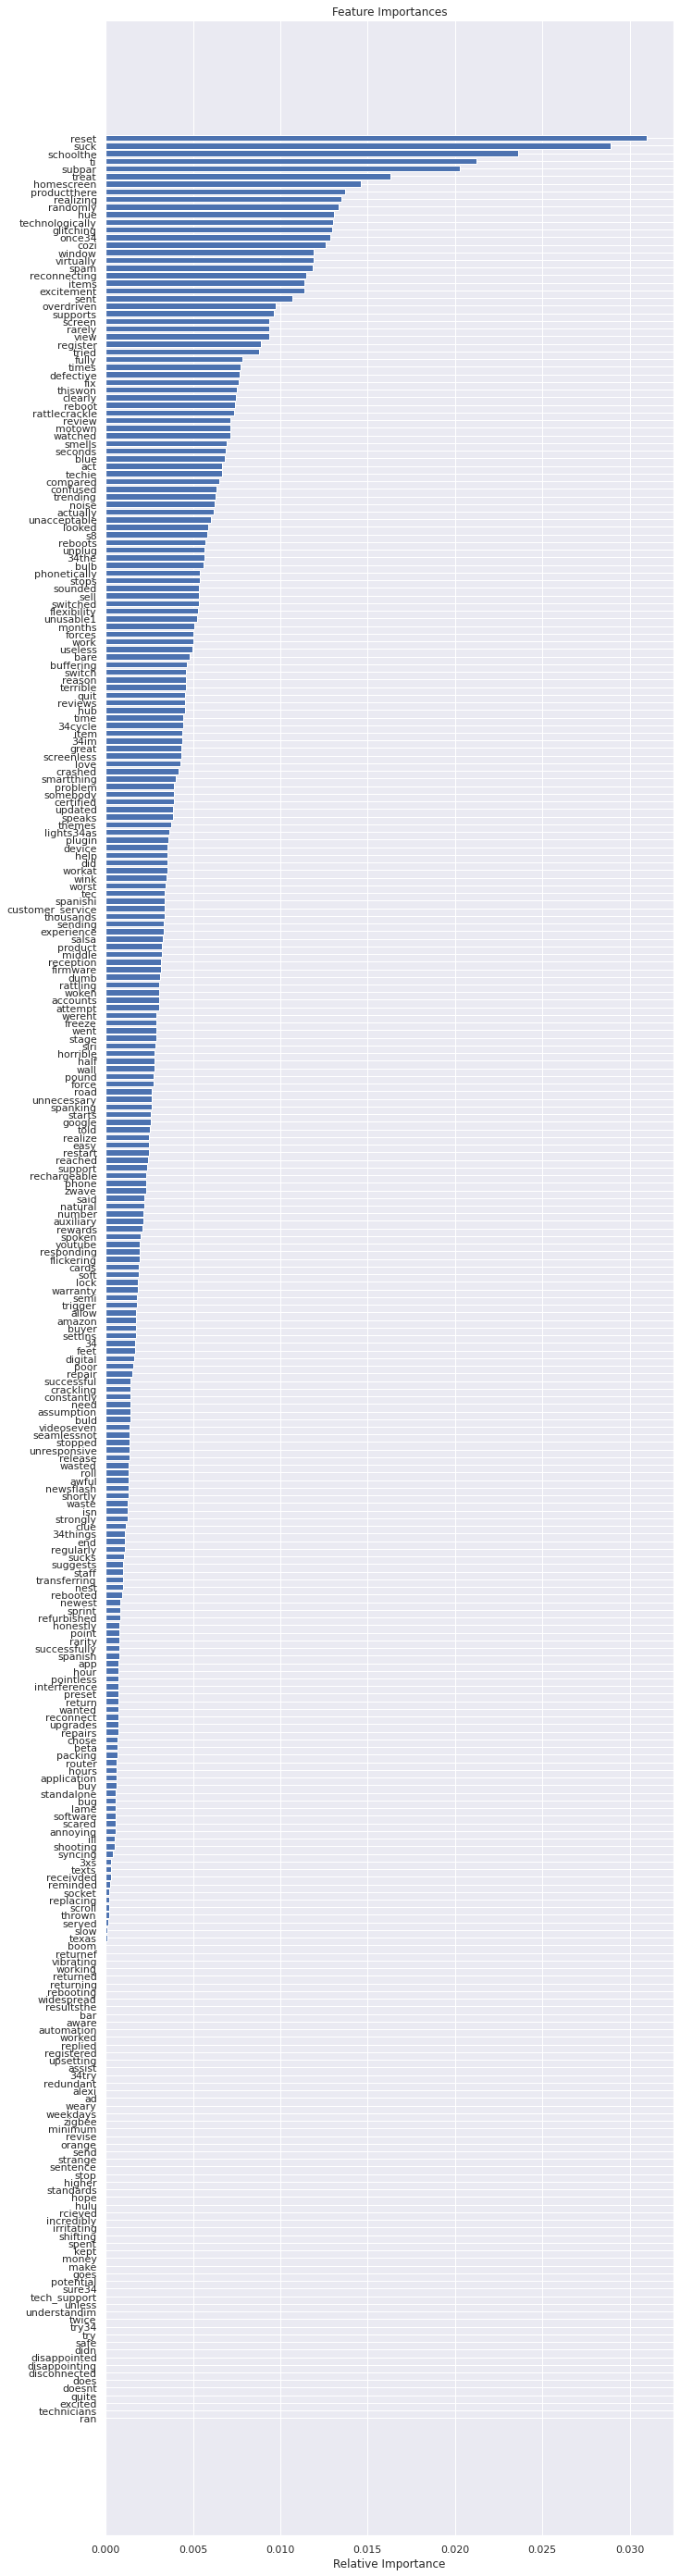

In [0]:
# définir best_clf
best_clf = best_rf_wv

features = count_vectorizer.get_feature_names()
mask = ch2.get_support()
features = list(compress(features, mask))

importances = best_clf.feature_importances_
indices = np.argsort(importances)
sns.set(rc={'figure.figsize':(11,50)})

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
count_test = count_vectorizer.transform(X_dev)
X_dev_vec_new = ch2.transform(X=count_test)

perm = PermutationImportance(best_clf, random_state=1).fit(X_dev_vec_new.toarray(), y_dev)
eli5.show_weights(perm, feature_names = features)

/usr/local/lib/python3.6/dist-packages/eli5/formatters/html.py:235: RuntimeWarning: invalid value encountered in double_scalars
  rel_weight = (abs(weight) / weight_range) ** 0.7


Weight,Feature
0 ± 0.0000,irritating
0 ± 0.0000,need
0 ± 0.0000,natural
0 ± 0.0000,motown
0 ± 0.0000,months
0 ± 0.0000,money
0 ± 0.0000,minimum
0 ± 0.0000,middle
0 ± 0.0000,make
0 ± 0.0000,love


In [0]:
best_clf.fit(count_train,y_train)
eli5.show_prediction(best_clf, doc=X_train[20], vec=count_vectorizer)

Like est un mot important, comme  time (gain de temps ou perte de temps) puis unfortunately qui marque la décéeption, useless, reset... La prise de décision est cohérente.

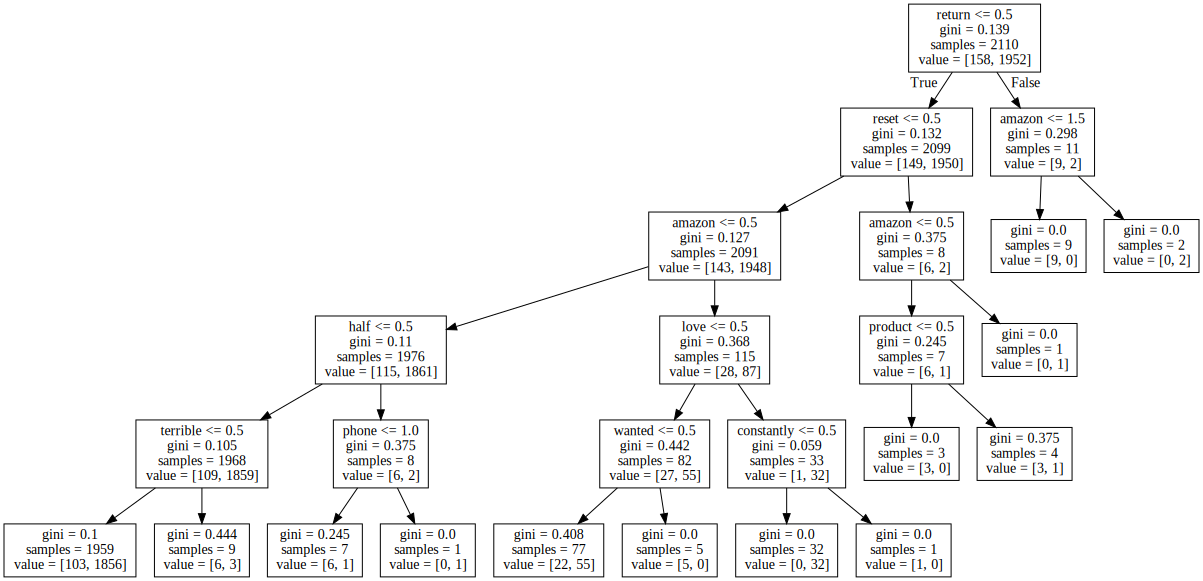

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(X_new, y_train)
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, feature_names=features)
graphviz.Source(tree_graph)

Return est le mot qui a le plus d'importance pour déterminer un commentaire négatif. Amazon (qui compare alexa à d'autres produits) est aussi signe de mécontentement. On peut deviner que "half" intervient pour dire que le client ne se sert pas de la moitié des gadgets du produit (inutilité). Terrible fait également parti des premiers segments. Le modèle est interprétable.

SVM

In [0]:


def plot_coefficients(classifier, feature_names, top_features=25):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha="right")
 plt.show()



In [0]:
cv = CountVectorizer()
cv.fit(X_train)
print(len(cv.vocabulary_))
print(cv.get_feature_names())



3893
['072318', '10', '100', '1000', '100x', '1010', '1030pm', '11', '1100sf', '129', '12am', '15', '150', '19', '1964', '1990', '1gb', '1st', '1st_generation', '20', '2017', '229', '23', '2448', '24ghz', '25', '29', '2999', '2nd', '2nd_generation', '2original', '2package', '30', '300', '30so', '334', '34', '342nd', '3434', '34a34', '34alexa', '34alexa34', '34card34', '34certified', '34computer34', '34cycle', '34cycle34', '34dot34', '34first', '34group34', '34hmmm', '34hub', '34im', '34it34', '34late', '34learn', '34listen34', '34minor', '34never', '34outlet34', '34personal34', '34philips', '34play', '34second', '34she34', '34skills34', '34smart', '34smart34', '34sorry', '34spying34', '34tell', '34the', '34things', '34this', '34try', '34turn', '34visual34', '34wake34me', '34warehouse34', '34whats', '35', '360', '39', '3999', '3dots', '3rd', '3xs', '40000', '45', '48', '4am', '4k', '4th', '50', '54', '5_stars', '5am', '5ghz', '5th', '600', '62', '672', '6th', '7000', '70s', '75', '7900'

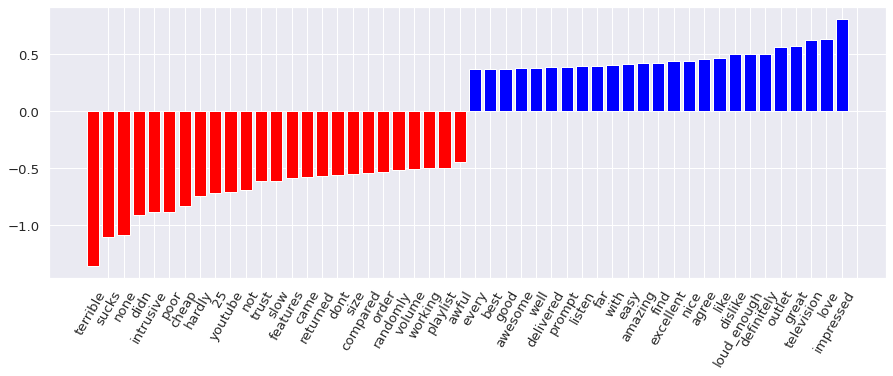

In [0]:
plot_coefficients(clf_svm, cv.get_feature_names())


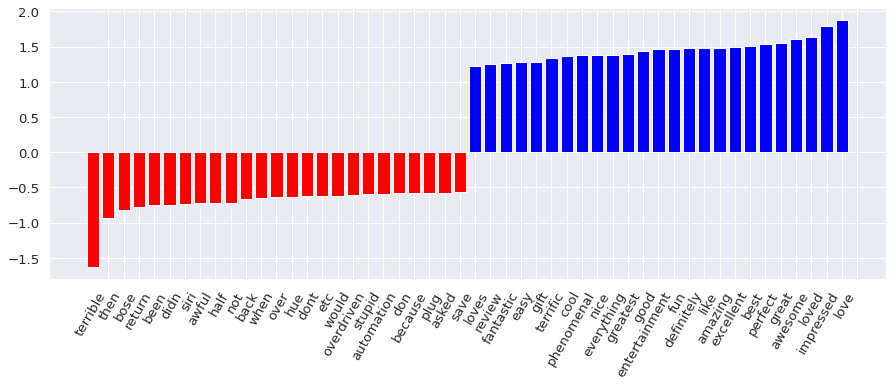

In [0]:
plot_coefficients(clf_svm_sm, cv.get_feature_names())

As you can see below, the plot provides useful insight into what features (words) are being used by the model to make the positive and negative classifications from a sentiment dataset. Some features seem reasonable while others such as ‘17’ and ‘bit’ are not. In any case visualising the top feature coefficients makes the mystery behind what the linear SVM classifier has learnt more transparent. I’ll conclude with a link to a good paper on SVM feature selection. In the paper the square of the coefficients are used as a ranking metric for deciding the relevance of a particular feature. In a future blog post I’ll cover feature ranking and selection using Information Gain.